# Health Exploration and Analytics
<img src="images/healthy.jpg" alt="healthy image" style="max-height: 450px;">
<div>
    Source: 
    <a href="https://www.franchiseindia.com/content/Diagnosing-the-beauty-of-wellness-business.5948">franchiseindia</a>
</div>

## Abstract
This notebook includes analytics on many datasets about our health. We make some graphs to understand some correlations in the data. 

## General Question
How does the environment we live in influence our health?

## Data Science is OSEMN. The OSEMN Pipeline
I'll follow the OSEMN data science pipeline (pronounced "awesome). I'll skip the fourth step because I don't have the needed skills to model the data for now.
1. Obtaining the data.
2. Scrubbing (cleaning) the data. This includes detecting, correcting, removing inacurrate records from the data.
3. Exploring and visualizing our data. This will help us to find patterns and trends.
4. Modeling the data. This will give us the power to predict.
5. Interpreting the data. This includes explaining your finding through communication.

Sources: [OSEMN Pipeline](https://www.linkedin.com/pulse/life-data-science-osemn-randy-lao/), [data cleaning](https://en.wikipedia.org/wiki/Data_cleansing)

In [1]:
%matplotlib inline

In [2]:
import os
import functools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame

## ATUS Health Data
Question: **How do eating habits of US people influence their health?**

Now let's consider another survey, done in the US. The survey results are located [here](https://www.kaggle.com/bls/eating-health-module-dataset/data). The data description is a little hard to read at first, but it's really useful. We're mostly interested in the file named "ehresp_2014.csv". Feel free to add information from other files if you need.
The study contains information about the eating habits and general health of people in the US.
Tidy up, clean, explore and visualize the data. Draw conclusions. Compare your results to what you already found in the previous two problems.

Dataset source: [kaggle](https://www.kaggle.com/bls/eating-health-module-dataset/data)

## Dataset Details


We can see more information for each column from the pdf bellow. 

We loaded the **EH Respondent File**, so we'll look for the columns which are in this file.

In [3]:
IFrame("data/3. EatingAndHealth/ehmintcodebk1416.pdf", width=980, height=400)

### Part 1: Obtaining the Data

In [4]:
data = pd.read_csv("data/3. EatingAndHealth/Eat and Health Respondent 2014.csv")
data.head()

,tucaseid,tulineno,eeincome1,erbmi,erhhch,erincome,erspemch,ertpreat,ertseat,ethgt,...,eumeat,eumilk,euprpmel,eusoda,eustores,eustreason,eutherm,euwgt,euwic,exincome1
0,20140101140007,1,-2,33.200001,1,-1,-1,30,2,0,...,1,2,1,-1,2,1,2,170,1,2
1,20140101140011,1,1,22.700001,3,1,-1,45,14,0,...,1,2,1,-1,1,2,2,128,2,0
2,20140101140028,1,2,49.400002,3,5,-1,60,0,0,...,-1,-1,2,2,-1,-1,-1,270,2,12
3,20140101140063,1,-2,-1.000000,3,-1,-1,0,0,0,...,2,2,1,1,2,6,-1,-2,2,2
4,20140101140168,1,2,31.000000,3,5,-1,65,0,0,...,1,2,1,2,1,1,2,210,1,0


###  Part 2: Scrubbing the Data

We have a lot of columns in this dataset, let's see them!

In [5]:
data.columns

Index(['tucaseid', 'tulineno', 'eeincome1', 'erbmi', 'erhhch', 'erincome',
       'erspemch', 'ertpreat', 'ertseat', 'ethgt', 'etwgt', 'eudietsoda',
       'eudrink', 'eueat', 'euexercise', 'euexfreq', 'eufastfd', 'eufastfdfrq',
       'euffyday', 'eufdsit', 'eufinlwgt', 'eusnap', 'eugenhth', 'eugroshp',
       'euhgt', 'euinclvl', 'euincome2', 'eumeat', 'eumilk', 'euprpmel',
       'eusoda', 'eustores', 'eustreason', 'eutherm', 'euwgt', 'euwic',
       'exincome1'],
      dtype='object')

#### Columns Selection
I'm interested in some of the columns, but not all.
Let's see a more details about these columns.

* erbmi: body mass index
    * Edited Universe: EUHGT > 0 and EUWGT > 0
    * valid entries: 0 (min value) - 200 (max value)
    

* euwgt: How much do you weigh without shoes? (in pounds)
    * Edited Universe: 
    * valid entries: 98 (min value) - 340 (max value)
    

* euhgt: How tall are you without shoes? (in inches)
    * Edited Universe: 
    * valid entries: 56 (min value) - 77 (max value)
    

* ertpreat: Total amount of time spent in primary eating and drinking (in minutes)
    * Edited Universe: all respondents
    * valid entries: 0 (min value) - 1440 (max value)


* eudrink: Not including plain water, were there any other times yesterday when you were drinking any beverages?
    * Edited Universe:
    * valid entries: 1 = Yes, 2 = No
    
    
* eueat: Were there any times you were eating any meals or snacks yesterday, for example while you were doing something else? 
    * Edited Universe:
    * valid entries: 1 = Yes, 2 = No
    
    
* euexercise: During the past 7 days, [fill: other than your regular job,**] did you participate in any physical activities or exercises for fitness and health such as running, bicycling, working out in a gym, walking for exercise, or playing sports?
    * Edited Universe:
    * valid entries: 1 = Yes, 2 = No
    
    
* euexfreq: How many times over the past 7 days did you take part in these activities?
    * Edited Universe:
    * valid entries: 1 (min value) - 97 (max value)
    
    
* eufastfd: Thinking back over the last 7 days, did you purchase any: prepared food from a deli, carry-out, delivery food, or fast food?
    * Edited Universe:
    * valid entries: 1 = Yes, 2 = No
    
    
* eufastfdfrq:  How many times in the last 7 days did you purchase: prepared food from a deli, carry-out, delivery food, or fast food?
    * Edited Universe:
    * valid entries: 1 (min value) - 95 (max value)
    
    
* eufdsit: Which of the following statements best describes the amount of food eaten in your household in the last 30 days - enough food to eat, sometimes not enough to eat, or often not enough to eat?
    * Edited Universe:
    * valid entries: 1 (enough to eat), 2 (sometimes not enough to eat), 3 (often not enough to eat)


* eugenhth: In general, would you say that your physical health was excellent, very good, good, fair, or poor?
    * Edited Universe:
    * valid entries: 1 (Excellent), 2 (Very good), 3 (Good), 4 (Fair), 5 (Poor)
    

* eumeat: In the last 7 days, did you prepare any meals with meat, poultry, or seafood?
    * Edited Universe:
    * valid entries: 1 = Yes, 2 = No
    
**Note**: Many ATUS variables have the following possible valid values: -1 (Blank), -2 (Don't know), -3 (Refused)

Okay, we have our choice for the columns, let's remove the other that we'll not use.

In [6]:
columns = [
    "erbmi",
    "euwgt",
    "euhgt",
    "ertpreat",
    "eudrink",
    "eueat",
    "euexercise",
    "euexfreq",
    "eufastfd",
    "eufastfdfrq",
    "eufdsit",
    "eugenhth",
    "eumeat"
]

data = data[columns]

From the note above we know that many ATUS variables have the following possible valid values: -1 (Blank), -2 (Don't know), -3 (Refused). I'll replace that values with nan (not a number) for easier working with data later.

In [7]:
data = data.replace([-1, -2, -3], np.nan)

In [8]:
data.head()

,erbmi,euwgt,euhgt,ertpreat,eudrink,eueat,euexercise,euexfreq,eufastfd,eufastfdfrq,eufdsit,eugenhth,eumeat
0,33.200001,170.0,60.0,30,2.0,1.0,2.0,NaN,2.0,NaN,1.0,1.0,1.0
1,22.700001,128.0,63.0,45,2.0,1.0,2.0,NaN,1.0,1.0,1.0,2.0,1.0
2,49.400002,270.0,62.0,60,1.0,2.0,2.0,NaN,2.0,NaN,1.0,5.0,NaN
3,NaN,NaN,64.0,0,1.0,2.0,2.0,NaN,2.0,NaN,1.0,2.0,2.0
4,31.000000,210.0,69.0,65,1.0,2.0,1.0,5.0,2.0,NaN,1.0,4.0,1.0


In [9]:
data.eudrink.head()

0    2.0
1    2.0
2    1.0
3    1.0
4    1.0
Name: eudrink, dtype: float64

We can see more information for each column from the pdf bellow. 

We loaded the **EH Respondent File**, so we'll look for the columns which are in this file.

In [10]:
IFrame("data/3. EatingAndHealth/ehmintcodebk1416.pdf", width=980, height=400)

In [11]:
data.columns

Index(['erbmi', 'euwgt', 'euhgt', 'ertpreat', 'eudrink', 'eueat', 'euexercise',
       'euexfreq', 'eufastfd', 'eufastfdfrq', 'eufdsit', 'eugenhth', 'eumeat'],
      dtype='object')

In [12]:
data.rename(columns = {
    "erbmi": "bmi",
    "euwgt": "weight",
    "euhgt": "height",
    "ertpreat": "eating_and_drinking_time",
    "eudrink": "beverages_drinking",
    "eueat": "meal_snack_eating",
    "euexercise": "exercise",
    "euexfreq": "exercise_frequency",
    "eufastfd": "purchase_food",
    "eufastfdfrq": "purchase_food_frequency",
    "eufdsit": "is_food_enough",
    "eugenhth": "psysical_health", #TODO: rename me to physical_health
    "eumeat": "meat_cooking",
}, inplace = True)

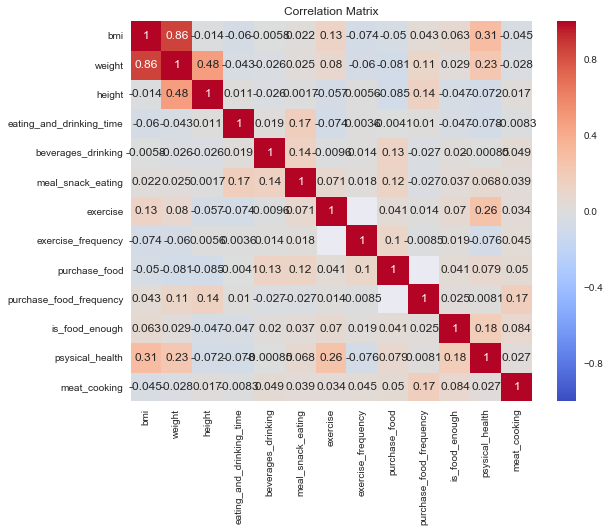

In [13]:
correlation = data.corr()
plt.figure(figsize = (9, 7))
sns.heatmap(correlation, cmap = "coolwarm", annot = True)
plt.title("Correlation Matrix")
plt.show()

In [14]:
data.head()

,bmi,weight,height,eating_and_drinking_time,beverages_drinking,meal_snack_eating,exercise,exercise_frequency,purchase_food,purchase_food_frequency,is_food_enough,psysical_health,meat_cooking
0,33.200001,170.0,60.0,30,2.0,1.0,2.0,NaN,2.0,NaN,1.0,1.0,1.0
1,22.700001,128.0,63.0,45,2.0,1.0,2.0,NaN,1.0,1.0,1.0,2.0,1.0
2,49.400002,270.0,62.0,60,1.0,2.0,2.0,NaN,2.0,NaN,1.0,5.0,NaN
3,NaN,NaN,64.0,0,1.0,2.0,2.0,NaN,2.0,NaN,1.0,2.0,2.0
4,31.000000,210.0,69.0,65,1.0,2.0,1.0,5.0,2.0,NaN,1.0,4.0,1.0


In [15]:
def map_column_values(column_name, mapping_dictionary):
    data[column_name] = data[column_name].map(mapping_dictionary)

In [16]:
mapping_dictionary = {
    1: "yes",
    2: "no"
}
map_column_values("beverages_drinking", mapping_dictionary)
map_column_values("meal_snack_eating", mapping_dictionary)
map_column_values("exercise", mapping_dictionary)
map_column_values("purchase_food", mapping_dictionary)
map_column_values("meat_cooking", mapping_dictionary)

In [17]:
mapping_dictionary = {
    1: "enough to eat",
    2: "sometimes enough to eat",
    3: "often not enough to eat"
}
map_column_values(data.is_food_enough.name, mapping_dictionary)
data.is_food_enough = data.is_food_enough.astype("category")

mapping_dictionary = {
    1: "excellent",
    2: "very good",
    3: "good",
    4: "fair",
    5: "poor"
}
map_column_values(data.psysical_health.name, mapping_dictionary)
data.psysical_health = data.psysical_health.astype("category")

In [18]:
print(data.is_food_enough.unique(), os.linesep)
print(data.psysical_health.unique())

[enough to eat, sometimes enough to eat, often not enough to eat, NaN]
Categories (3, object): [enough to eat, sometimes enough to eat, often not enough to eat] 

[excellent, very good, poor, fair, good, NaN]
Categories (5, object): [excellent, very good, poor, fair, good]


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11212 entries, 0 to 11211
Data columns (total 13 columns):
bmi                         10637 non-null float64
weight                      10797 non-null float64
height                      11051 non-null float64
eating_and_drinking_time    11212 non-null int64
beverages_drinking          11202 non-null object
meal_snack_eating           11149 non-null object
exercise                    11155 non-null object
exercise_frequency          6993 non-null float64
purchase_food               11169 non-null object
purchase_food_frequency     6440 non-null float64
is_food_enough              11161 non-null category
psysical_health             11128 non-null category
meat_cooking                8113 non-null object
dtypes: category(2), float64(5), int64(1), object(5)
memory usage: 985.8+ KB


### Part 3: Exploring the Data

In [20]:
data.shape

(11212, 13)

We have 11212 observations (rows) and 13 features (columns)

Let's see the column types and the non-null rows count for each column

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11212 entries, 0 to 11211
Data columns (total 13 columns):
bmi                         10637 non-null float64
weight                      10797 non-null float64
height                      11051 non-null float64
eating_and_drinking_time    11212 non-null int64
beverages_drinking          11202 non-null object
meal_snack_eating           11149 non-null object
exercise                    11155 non-null object
exercise_frequency          6993 non-null float64
purchase_food               11169 non-null object
purchase_food_frequency     6440 non-null float64
is_food_enough              11161 non-null category
psysical_health             11128 non-null category
meat_cooking                8113 non-null object
dtypes: category(2), float64(5), int64(1), object(5)
memory usage: 985.8+ KB


In [22]:
data_without_nan = data.dropna()
data_without_nan.shape

(2831, 13)

In [23]:
def plot_correlation_matrix(data):
    correlation = data.corr()
    plt.figure(figsize = (9, 7))
    sns.heatmap(correlation, cmap = "coolwarm", annot = True)
    plt.title("Correlation Matrix")
    plt.show()

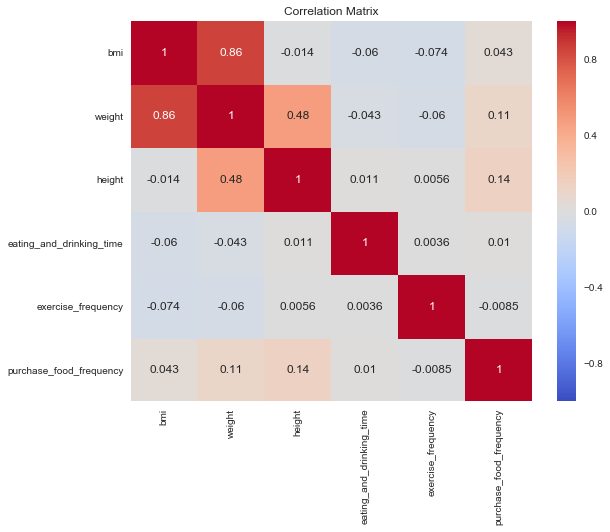

In [24]:
plot_correlation_matrix(data)

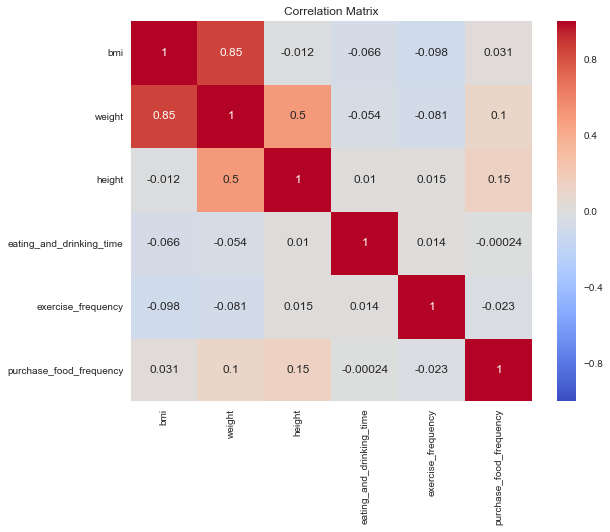

In [25]:
plot_correlation_matrix(data_without_nan)

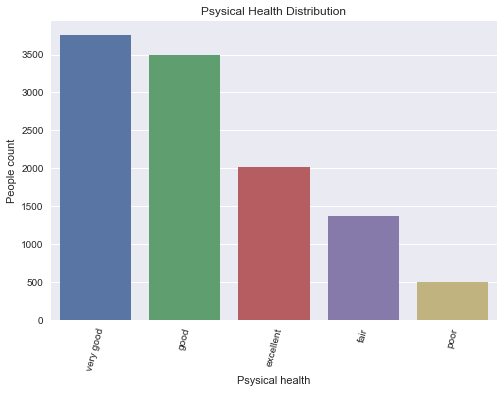

In [26]:
plt.title("Physical Health Distribution")
sns.countplot(data = data, x = data.psysical_health.name, order = data.psysical_health.value_counts().index)
plt.xlabel("Physical health")
plt.ylabel("People count")
plt.xticks(rotation = 75)
plt.show()

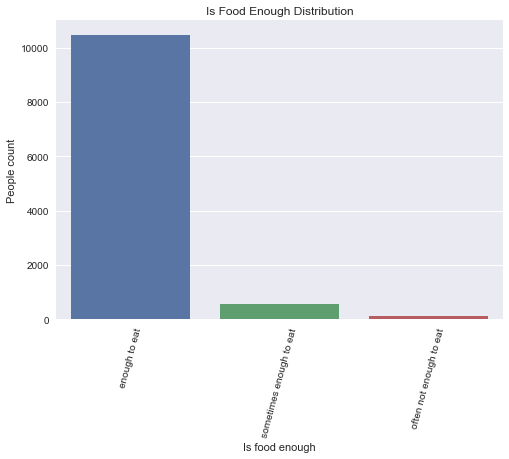

In [27]:
plt.title("Is Food Enough Distribution")
sns.countplot(data = data, x = data.is_food_enough.name, order = data.is_food_enough.value_counts().index)
plt.xlabel("Is food enough")
plt.ylabel("People count")
plt.xticks(rotation = 75)
plt.show()

In [28]:
psysical_health_order = ["excellent", "very good", "good", "fair", "poor"]
def countplot(data, y, hue, order):
    figure, axes = plt.subplots(figsize = (15, 4))
    plt.title(y + " vs " + hue)
    sns.countplot(data = data, y = data[y], hue = hue, order = order)
    plt.show()

In [29]:
def compare_bool_variable_to_psysical_health(column_name):
    for key, value in data.groupby(data.psysical_health.name):
        yes_percentage = len(value[value[column_name] == "yes"]) / len(value) * 100
        no_percentage = len(value[value[column_name] == "no"]) / len(value) * 100
        print(data.psysical_health.name + ": " + key)
        print(column_name + ":", "{:.2f}%".format(yes_percentage))
        print("no " + column_name + ":", "{:.2f}%".format(no_percentage))
        print()

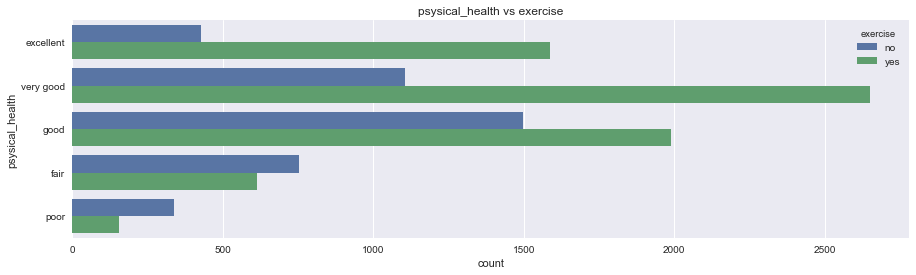

In [30]:
countplot(data, data.psysical_health.name, data.exercise.name, psysical_health_order)

In [31]:
pd.crosstab(data.psysical_health, data.exercise)

exercise,no,yes
psysical_health,,
excellent,428,1588
fair,752,614
good,1498,1989
poor,338,156
very good,1106,2648


In [32]:
compare_bool_variable_to_psysical_health(data.exercise.name)

psysical_health: excellent
exercise: 78.73%
no exercise: 21.22%

psysical_health: fair
exercise: 44.92%
no exercise: 55.01%

psysical_health: good
exercise: 56.98%
no exercise: 42.91%

psysical_health: poor
exercise: 31.45%
no exercise: 68.15%

psysical_health: very good
exercise: 70.48%
no exercise: 29.44%



It's looks like that there's a correlation between the psysical health and doing exercises.

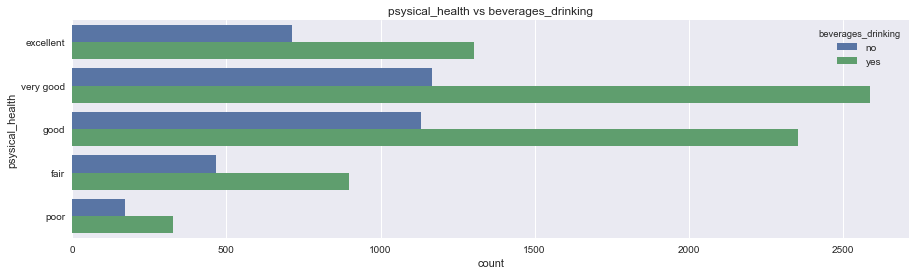

In [33]:
countplot(data, data.psysical_health.name, data.beverages_drinking.name, psysical_health_order)

In [34]:
pd.crosstab(data.psysical_health, data.beverages_drinking)

beverages_drinking,no,yes
psysical_health,,
excellent,714,1303
fair,466,899
good,1131,2354
poor,171,325
very good,1168,2587


In [35]:
compare_bool_variable_to_psysical_health(data.beverages_drinking.name)

psysical_health: excellent
beverages_drinking: 64.60%
no beverages_drinking: 35.40%

psysical_health: fair
beverages_drinking: 65.76%
no beverages_drinking: 34.09%

psysical_health: good
beverages_drinking: 67.43%
no beverages_drinking: 32.40%

psysical_health: poor
beverages_drinking: 65.52%
no beverages_drinking: 34.48%

psysical_health: very good
beverages_drinking: 68.86%
no beverages_drinking: 31.09%



I don't think that there's a correlation between these 2 columns.

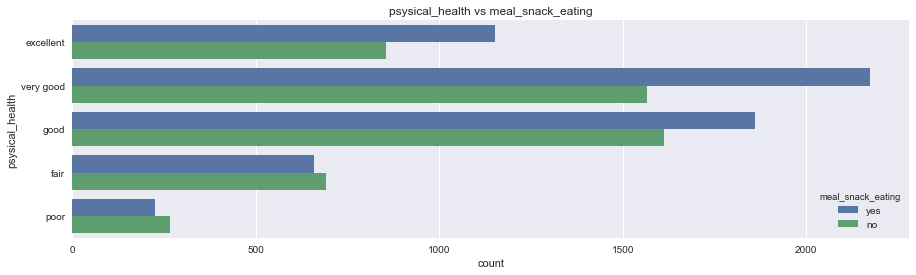

In [36]:
countplot(data, data.psysical_health.name, data.meal_snack_eating.name, psysical_health_order)

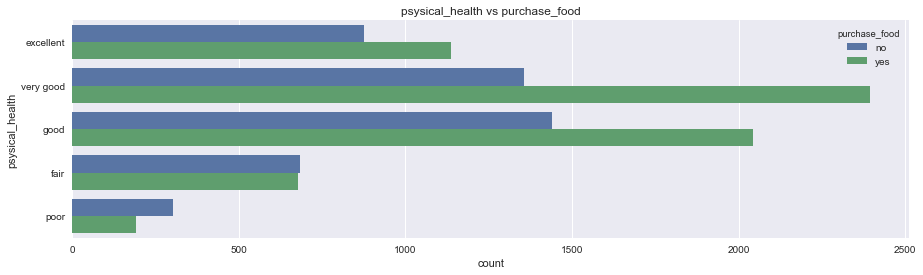

In [37]:
countplot(data, data.psysical_health.name, data.purchase_food.name, psysical_health_order)

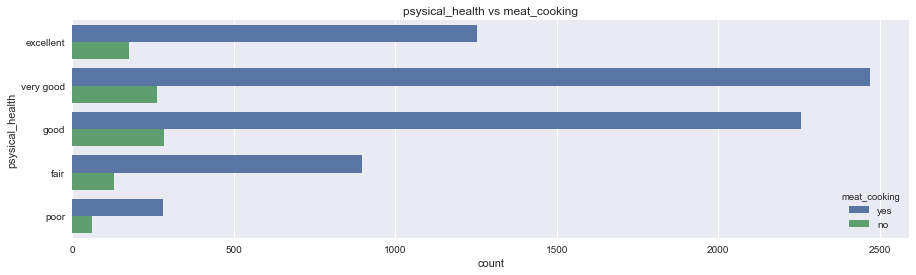

In [38]:
countplot(data, data.psysical_health.name, data.meat_cooking.name, psysical_health_order)

### Part 5: Interpreting the Data
From all the graphs above all I understand is that exercise is very important for our psysical health